In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
import itertools
from datetime import datetime
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.family"] = "sans-serif"
print('hello')

hello


In [19]:
pwd

'/Users/bashirmohammed/Documents/GitHub/daphne/Documentation_scripts_master/correlation_analysis/t-sne'

In [2]:
df = pd.read_csv('2019_concat_data.csv')

In [3]:
df.shape

(8737, 106)

In [4]:
#del df['time']
#del df['Days']

In [5]:
df = pd.read_csv('2019_concat_data.csv', index_col=0)

In [6]:
del df['time']

In [7]:


df.head()

SACR_SUNN_in  SACR_SUNN_out  LOND_NEWY_in  LOND_NEWY_out   JGI_SACR_in  \
0  1.133655e+10   1.353560e+10  1.308054e+10   1.118905e+10  9.856045e+04   
1  1.033284e+10   1.277450e+10  1.346870e+10   9.126663e+09  3.906243e+07   
2  8.876761e+09   1.160661e+10  1.189719e+10   1.274241e+10  4.859224e+07   
3  1.141132e+10   1.148750e+10  1.297900e+10   1.207547e+10  4.571019e+04   
4  1.293554e+10   1.166589e+10  1.139435e+10   1.383934e+10  6.438687e+04   

   JGI_SACR_out  HOUS_PANTEX_in  HOUS_PANTEX_out  BOIS_PNWG_in  BOIS_PNWG_out  \
0  2.161109e+08    4.958271e+07     1.225558e+08  1.203009e+07   1.254331e+07   
1  5.634560e+07    1.912810e+07     6.069445e+07  1.087812e+07   8.995660e+06   
2  7.115637e+07    2.070451e+07     1.571161e+07  3.951148e+07   6.629859e+06   
3  8.294493e+07    3.326195e+06     1.071702e+07  1.091743e+07   7.195915e+06   
4  8.829242e+07    1.483401e+07     1.229402e+07  4.991357e+07   9.801796e+06   

   ...  AMST_LOND_in  AMST_LOND_out  FNAL_STAR_in  FNAL_STAR_out  \
0  ...  2.028780e+10   8.791009e+09  6.157185e+07   2.363276e+05   
1  ...  2.174398e+10   8.993189e+09  3.081849e+07   1.190536e+08   
2  ...  2.215961e+10   8.881044e+09  7.118097e+06   1.023241e+08   
3  ...  1.942219e+10   1.246489e+10  7.322032e+07   1.048417e+08   
4  ...  2.051460e+10   1.104386e+10  6.738803e+07   1.179567e+07   

   BOST_STAR_in  BOST_STAR_out  BOST_NEWY_in  BOST_NEWY_out  ATLA_WASH_in  \
0  4.840072e+08   5.048601e+08  3.100098e+09   1.412909e+09  5.879588e+09   
1  5.102085e+08   8.270927e+08  2.746086e+09   1.318666e+09  5.768907e+09   
2  5.325426e+08   3.344625e+08  2.094773e+09   1.450597e+09  6.436416e+09   
3  3.268280e+09   6.440082e+08  1.719274e+09   9.510493e+08  7.083091e+09   
4  2.481459e+08   5.165409e+08  1.410758e+09   1.211944e+09  1.068952e+10   

   ATLA_WASH_out  
0   1.308217e+10  
1   1.341289e+10  
2   1.308143e+10  
3   1.485971e+10  
4   1.541085e+10  

[5 rows x 104 columns]

In [8]:
#df=(df-df.mean())/df.std()

In [9]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [10]:
df.shape

(8737, 104)

In [11]:
df.head()

SACR_SUNN_in  SACR_SUNN_out  LOND_NEWY_in  LOND_NEWY_out  JGI_SACR_in  \
0      0.133741       0.118870      0.246055       0.188515     0.000503   
1      0.121199       0.111736      0.253356       0.153768     0.199237   
2      0.103004       0.100788      0.223795       0.214686     0.247844   
3      0.134676       0.099671      0.244144       0.203450     0.000233   
4      0.153722       0.101343      0.214336       0.233168     0.000328   

   JGI_SACR_out  HOUS_PANTEX_in  HOUS_PANTEX_out  BOIS_PNWG_in  BOIS_PNWG_out  \
0      0.222028        0.180221         0.101561      0.009058       0.002471   
1      0.057888        0.069526         0.050297      0.008191       0.001772   
2      0.073105        0.075256         0.013020      0.029751       0.001306   
3      0.085216        0.012090         0.008881      0.008221       0.001417   
4      0.090710        0.053918         0.010188      0.037584       0.001931   

   ...  AMST_LOND_in  AMST_LOND_out  FNAL_STAR_in  FNAL_STAR_out  \
0  ...      0.396253       0.109944      0.025392       0.000788   
1  ...      0.425104       0.112515      0.012709       0.396906   
2  ...      0.433339       0.111089      0.002935       0.341133   
3  ...      0.379102       0.156660      0.030196       0.349526   
4  ...      0.400746       0.138591      0.027790       0.039325   

   BOST_STAR_in  BOST_STAR_out  BOST_NEWY_in  BOST_NEWY_out  ATLA_WASH_in  \
0      0.004951       0.006842      0.060004       0.028817      0.085360   
1      0.005219       0.011210      0.053152       0.026895      0.083753   
2      0.005447       0.004533      0.040545       0.029586      0.093444   
3      0.033429       0.008728      0.033277       0.019397      0.102832   
4      0.002538       0.007001      0.027306       0.024718      0.155191   

   ATLA_WASH_out  
0       0.223636  
1       0.229290  
2       0.223624  
3       0.254023  
4       0.263445  

[5 rows x 104 columns]

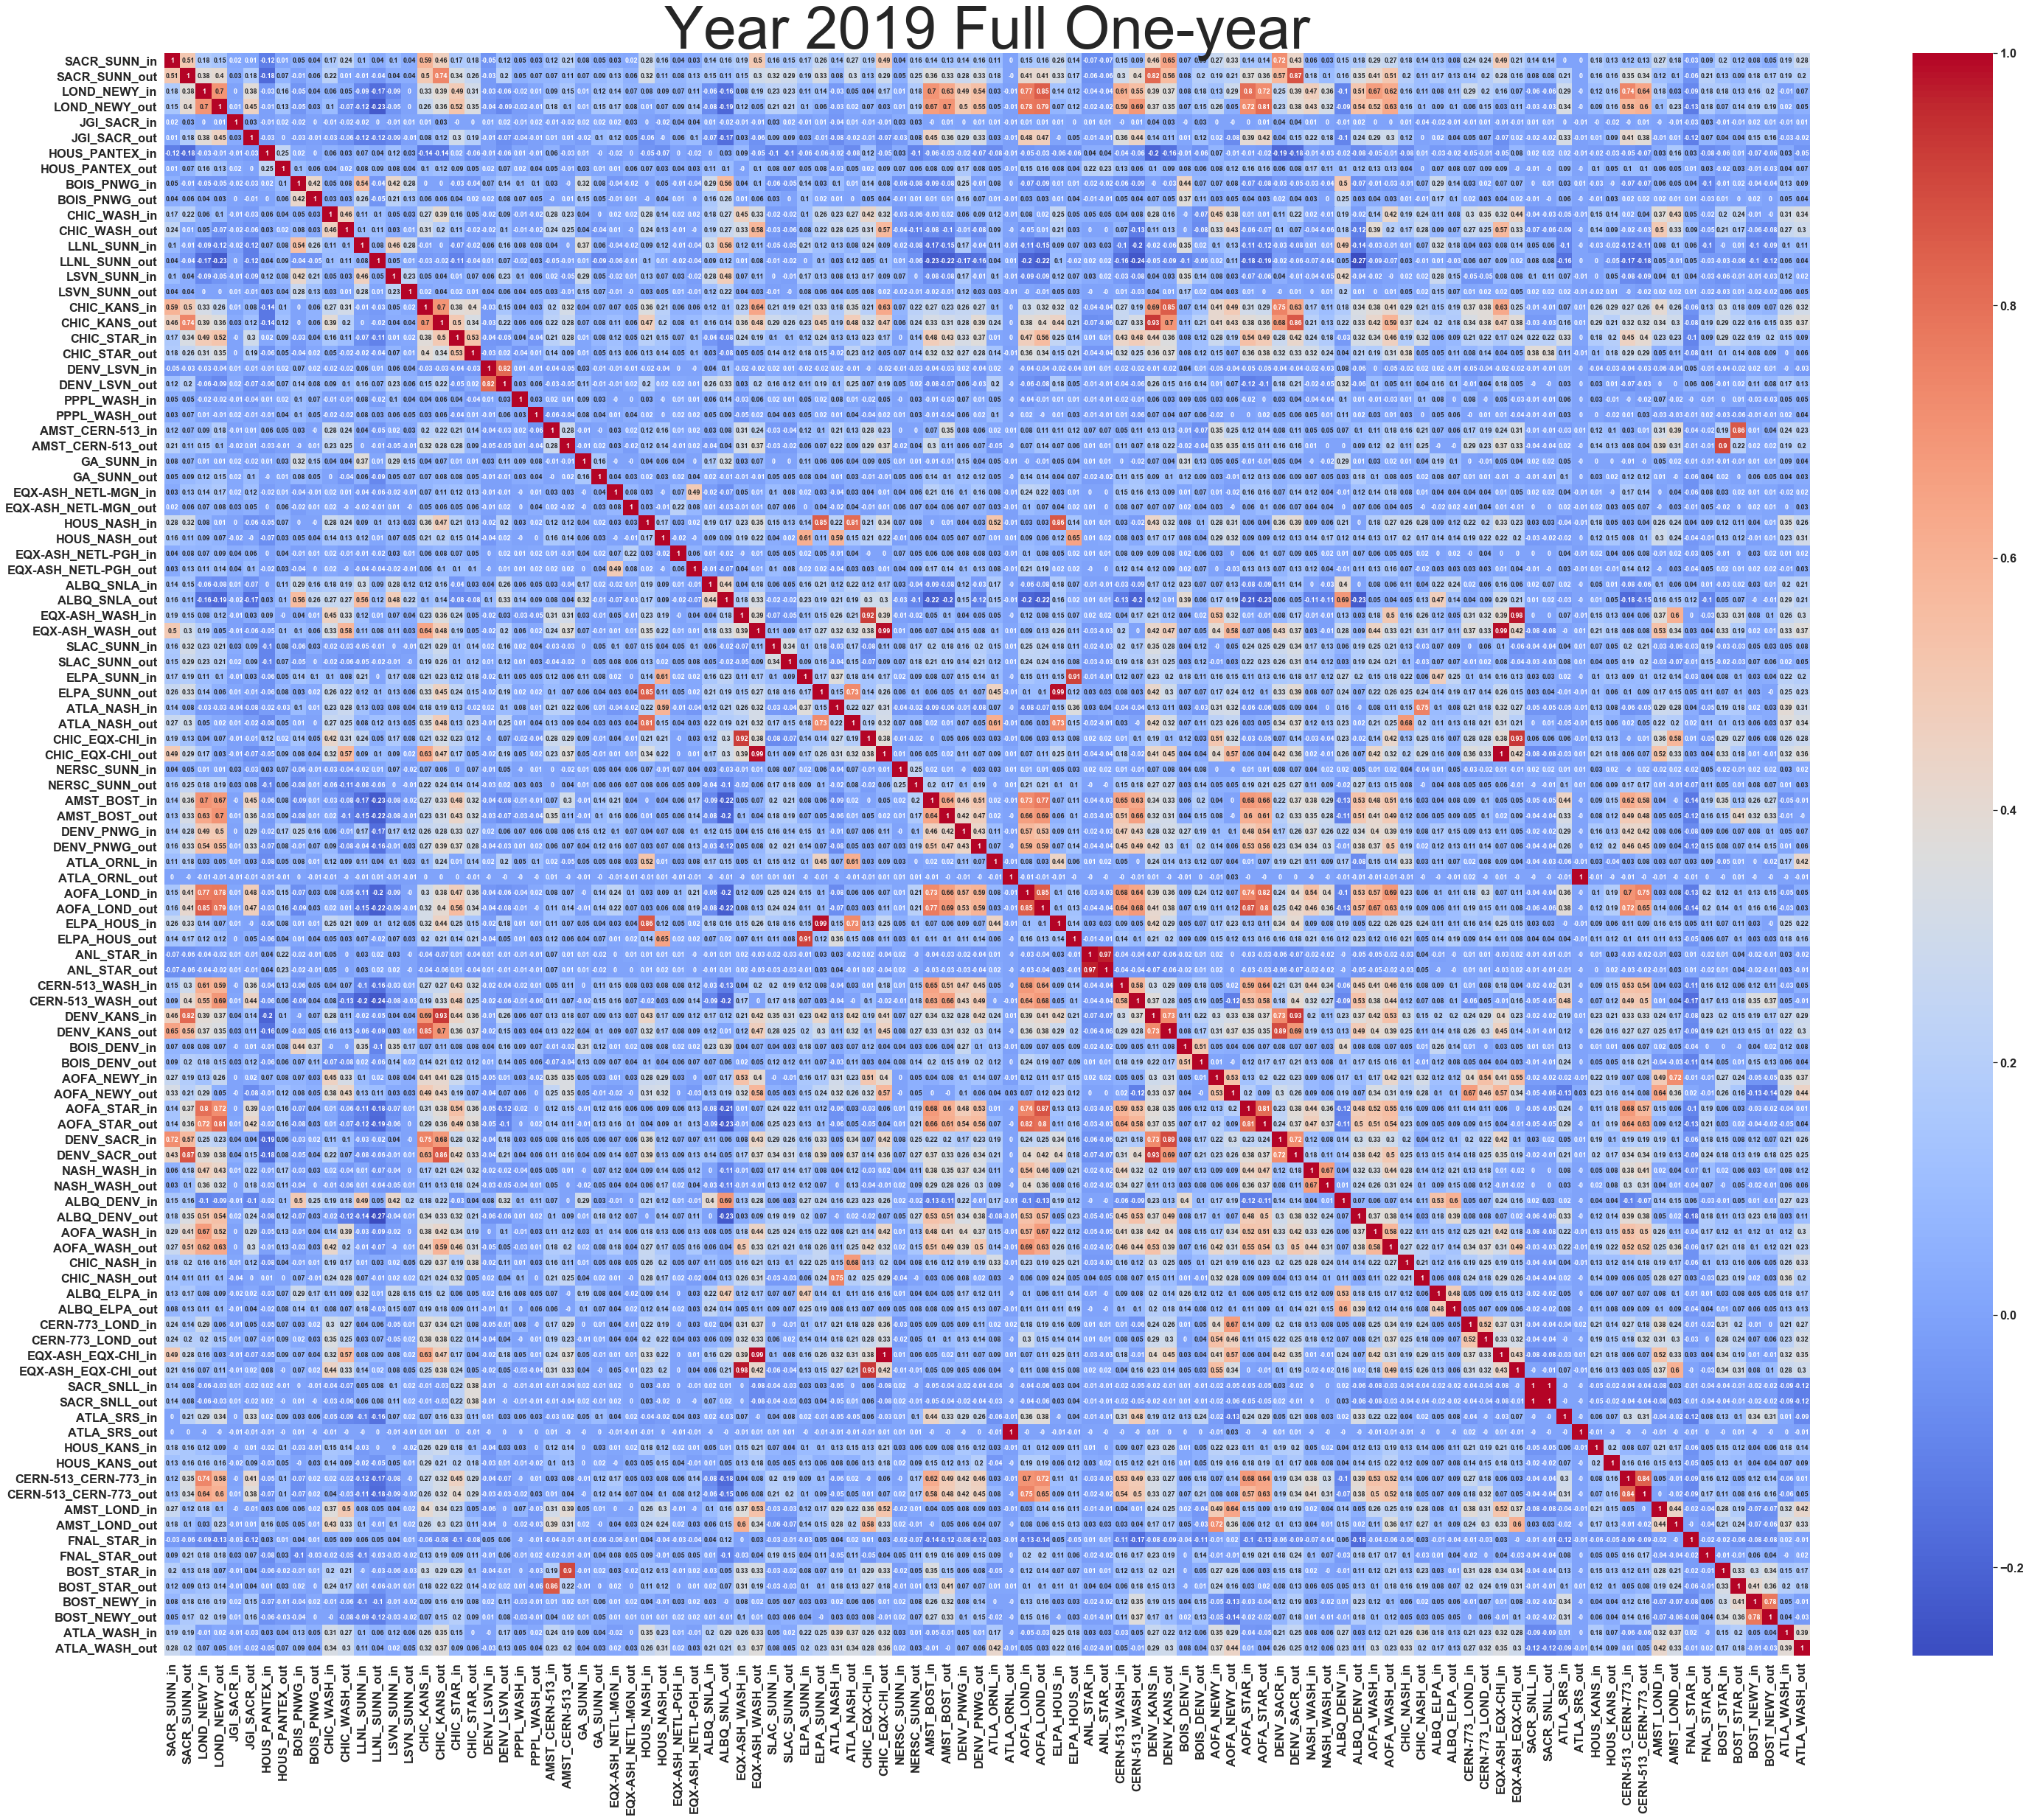

In [12]:
corr = df.corr().round(2)
plt.figure(figsize = (50,40))
sns.set(font_scale=1.5)
sns.heatmap(corr,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year 2019 Full One-year", fontsize=80)
plt.savefig('corr_oneyear.png')

In [13]:
df1 = df.loc[0:182, :]

In [14]:
df1.shape

(183, 104)

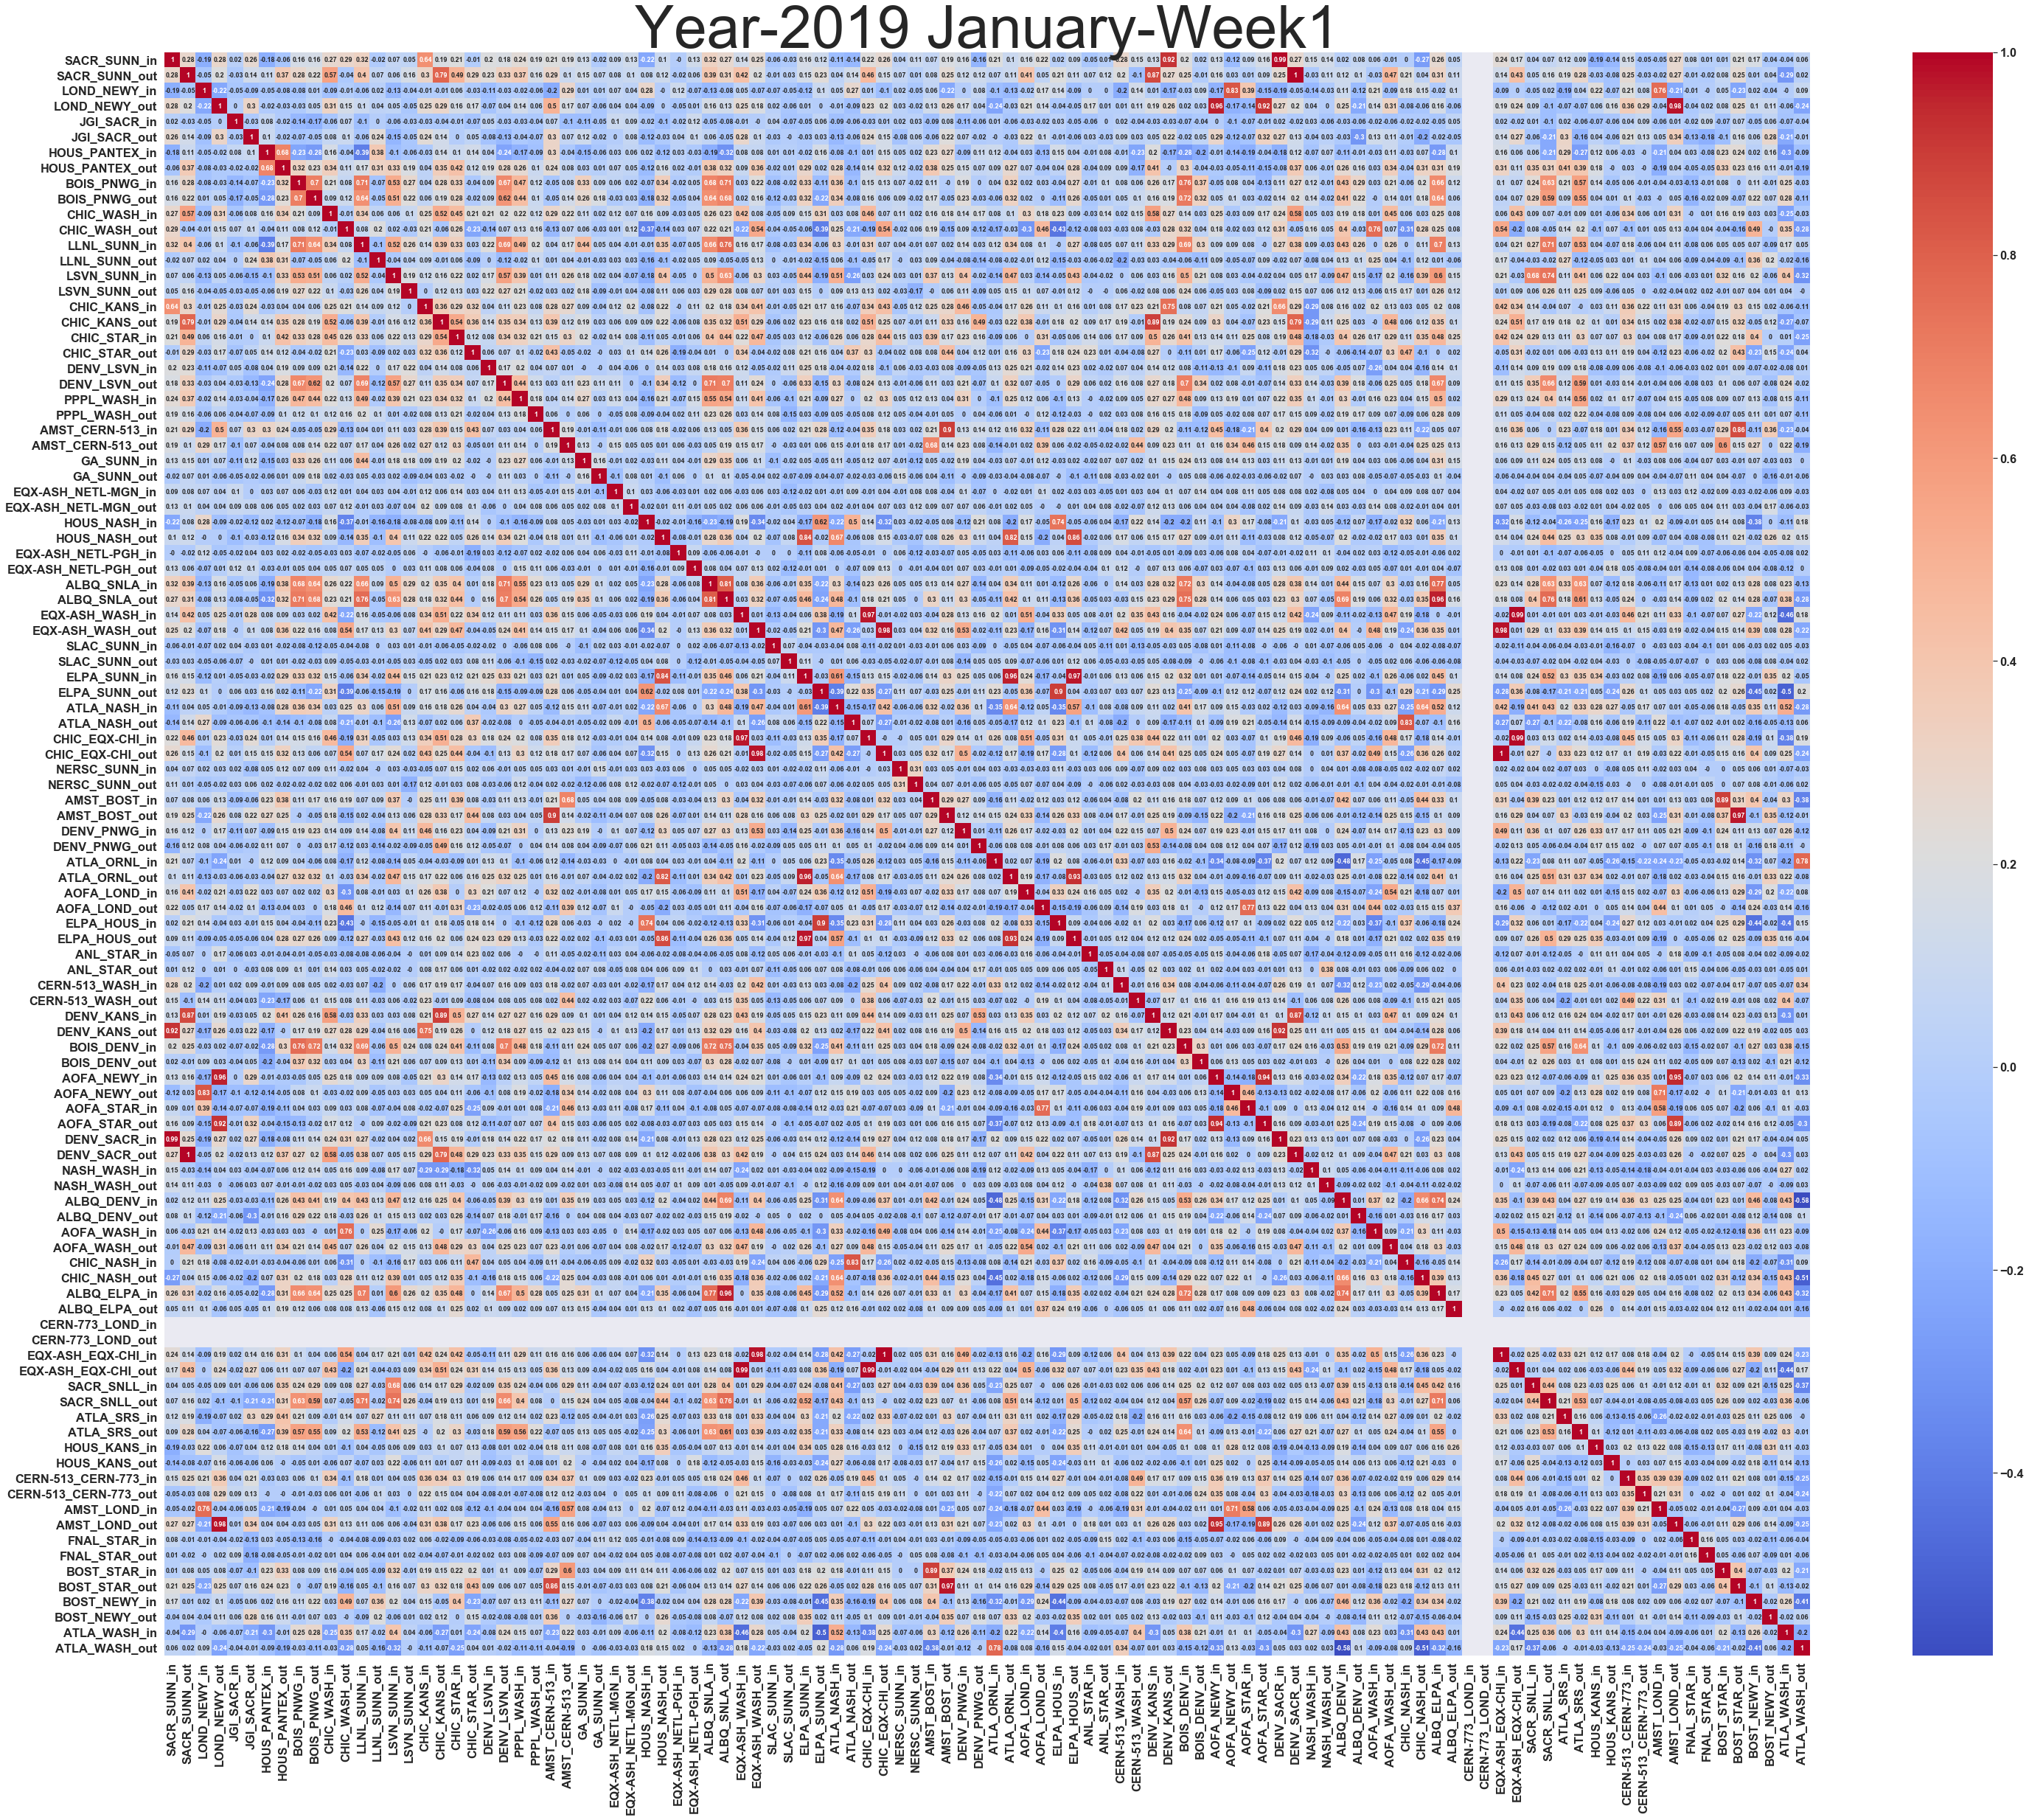

In [15]:
corr1 = df1.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr1,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 January-Week1", fontsize=80)
plt.savefig('corr_janwk1.png')

In [16]:
df2 = df.loc[183:365, :]

In [17]:
df2.shape

(183, 104)

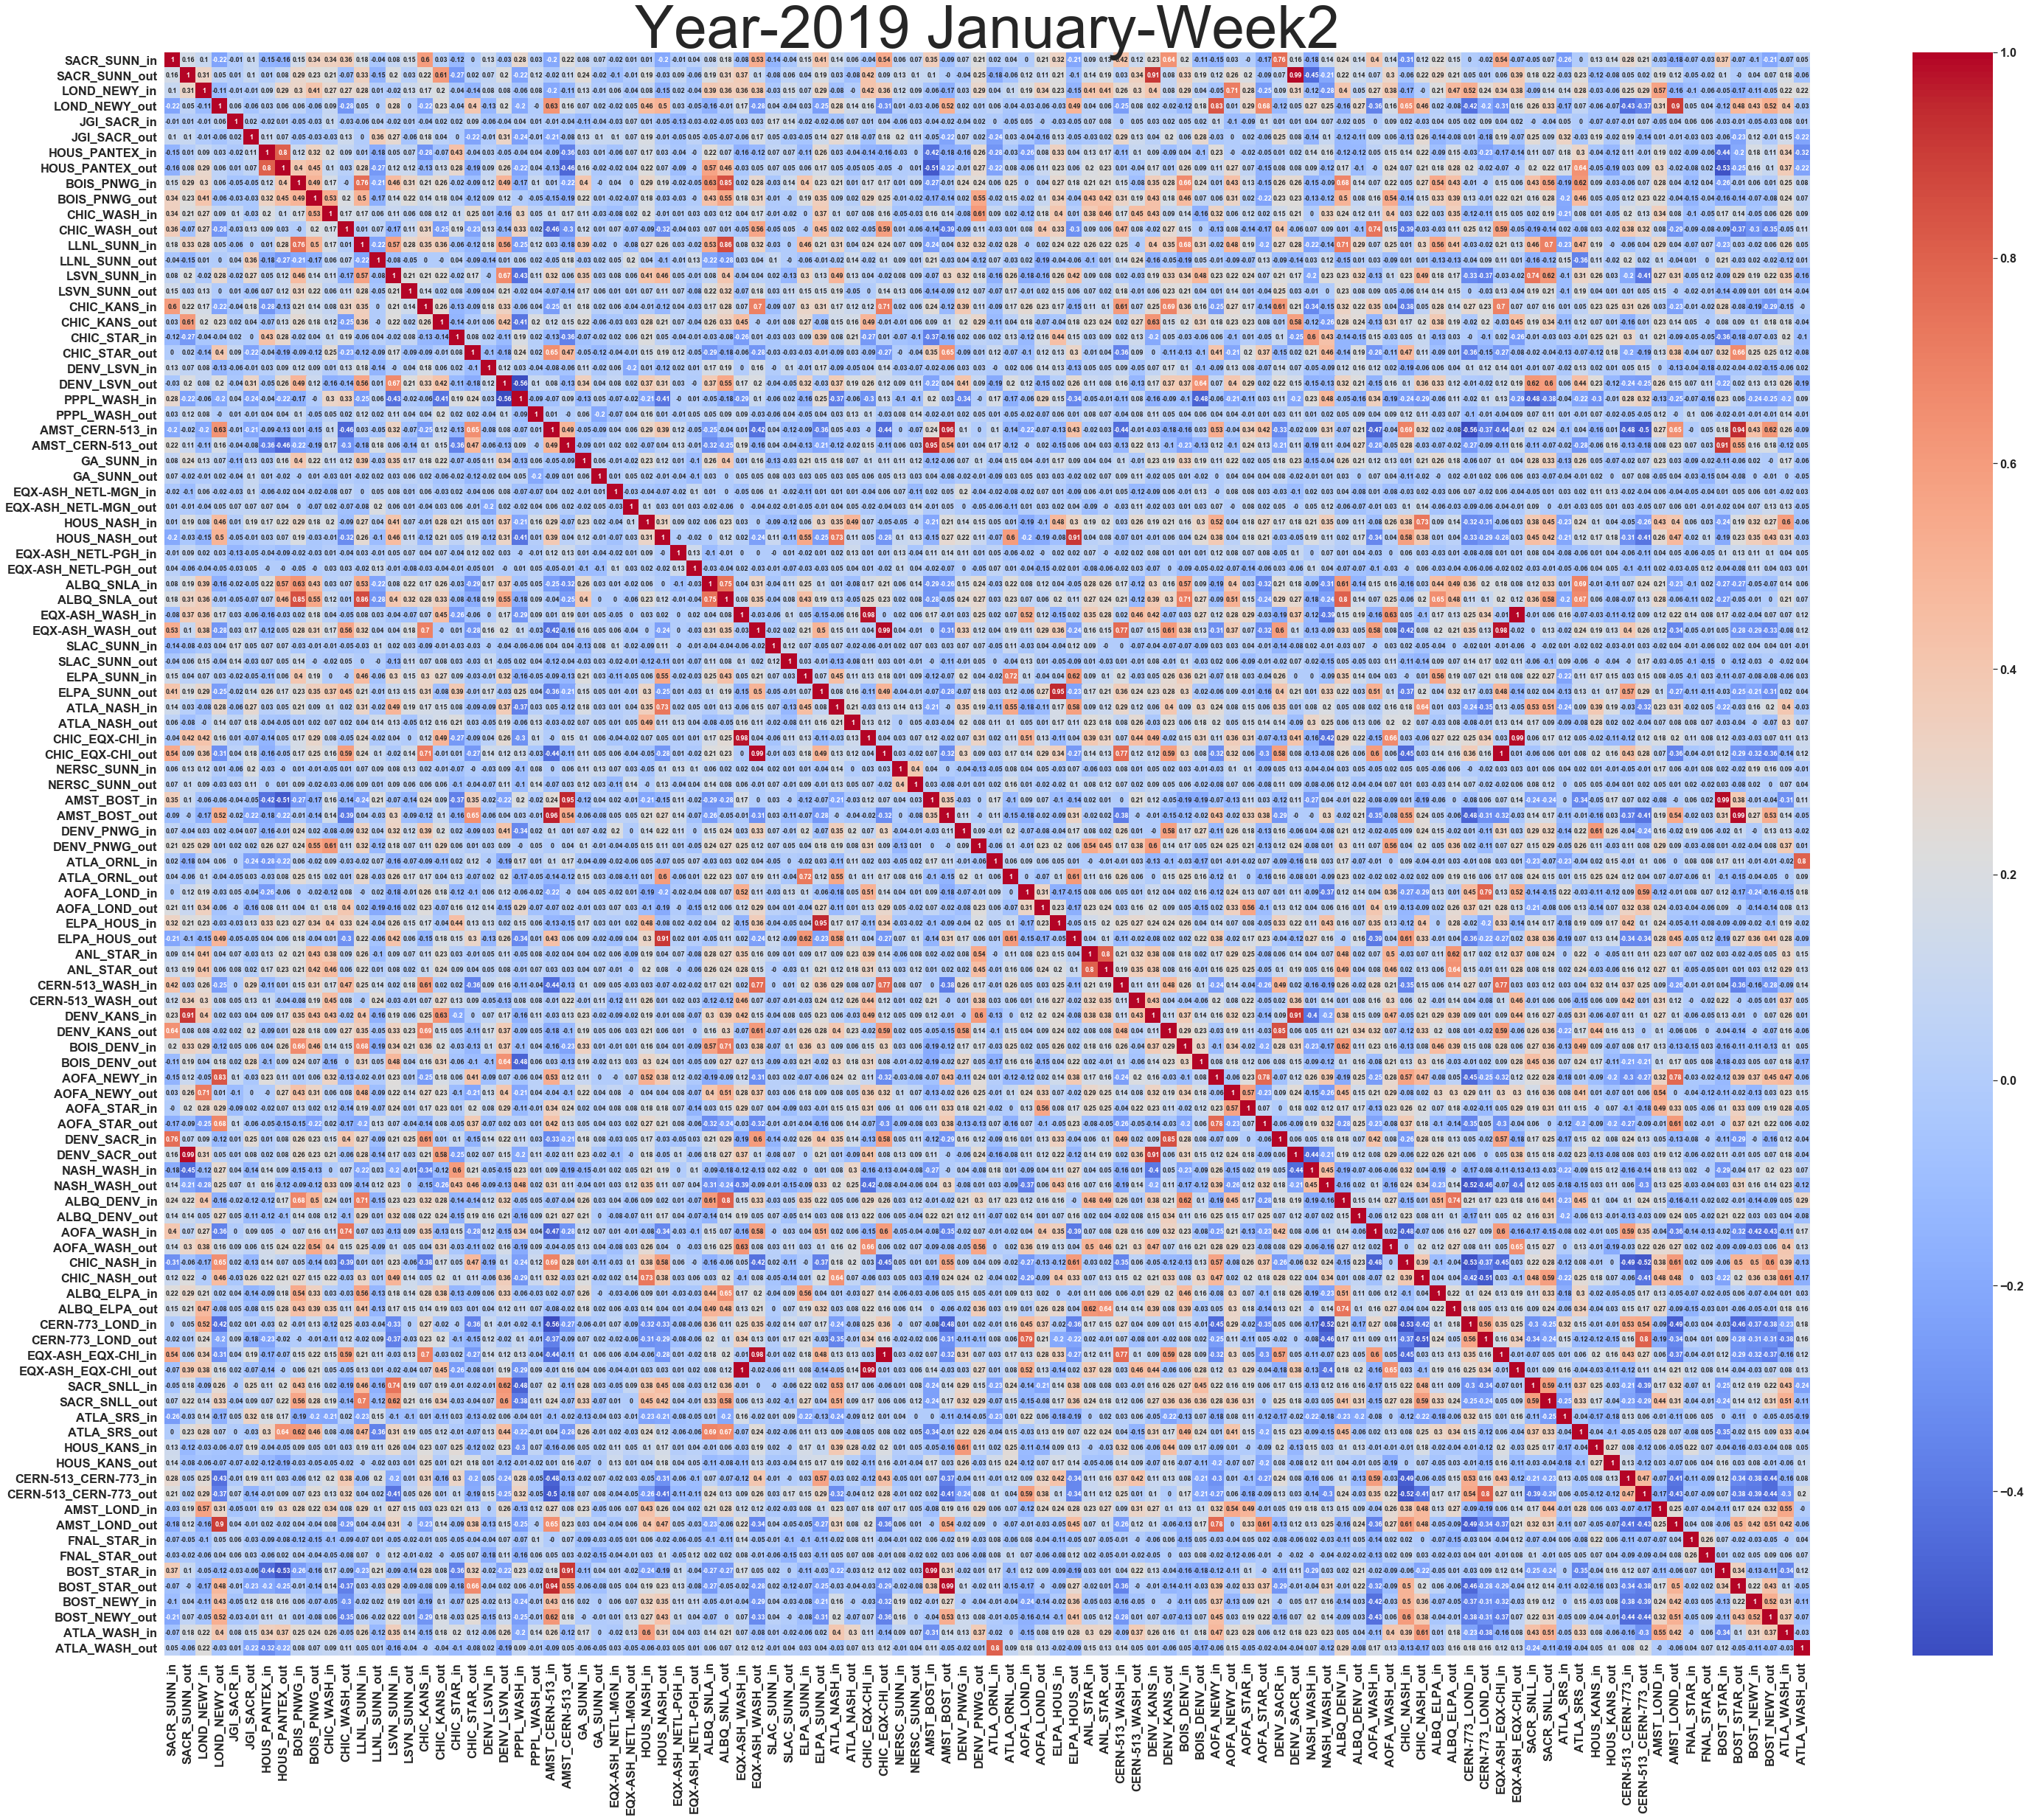

In [18]:
corr2 = df2.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr2,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 January-Week2", fontsize=80)
plt.savefig('corr_janwk2.png')

In [ ]:
df3 = df.loc[366:542, :]

In [ ]:
df3.shape

In [ ]:
corr3 = df3.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr3,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 January-Week3", fontsize=80)
plt.savefig('corr_janwk3.png')

In [ ]:
df4 = df.loc[543:730, :]

In [ ]:
corr4 = df4.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr4,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 January-Week4", fontsize=80)
plt.savefig('corr_janwk4.png')

In [ ]:
df5 = df.loc[731:912, :]

In [ ]:
df5.shape

In [ ]:

corr5 = df5.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr5,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 February-Week1", fontsize=80)
plt.savefig('corr_febwk1.png')

In [ ]:
df6 = df.loc[913:1094, :]

In [ ]:
corr6 = df6.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr6,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 February-Week2", fontsize=80)
plt.savefig('corr_febwk2.png')

In [ ]:
df7 = df.loc[1095:1276, :]

In [ ]:
corr7 = df7.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr7,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 February-Week3", fontsize=80)
plt.savefig('corr_febwk3.png')

In [ ]:
df8 = df.loc[1277:1460, :]

In [ ]:
corr8 = df8.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr8,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 February-Week4", fontsize=80)
plt.savefig('corr_febwk4.png')

In [ ]:
df9 = df.loc[1461:1642, :]

In [ ]:

corr9 = df9.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr9,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 March-Week1", fontsize=80)
plt.savefig('corr_marwk1.png')

In [ ]:
df10 = df.loc[1643:1824, :]

In [ ]:

corr10 = df10.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr10,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 March-Week2", fontsize=80)
plt.savefig('corr_marwk2.png')

In [ ]:
df11 = df.loc[1825:2006, :]

In [ ]:
df11.shape

In [ ]:

corr11 = df11.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr11,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 March-Week3", fontsize=80)
plt.savefig('corr_marwk3.png')

In [ ]:
df12 = df.loc[2007:2190, :]

In [ ]:

corr12 = df12.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr12,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 March-Week4", fontsize=80)
plt.savefig('corr_marwk4.png')

In [ ]:
df13 = df.loc[2191:2372, :]

In [ ]:
corr13 = df13.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr13,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 April-Week1", fontsize=80)
plt.savefig('corr_aprwk1.png')

In [ ]:
df14 = df.loc[2373:2554, :]

In [ ]:
corr14 = df14.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr14,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 April-Week2", fontsize=80)
plt.savefig('corr_aprwk2.png')

In [ ]:
df15 = df.loc[2555:2736, :]

In [ ]:
corr15 = df15.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr15,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 April-Week3", fontsize=80)
plt.savefig('corr_aprwk3.png')

In [ ]:
df16 = df.loc[2737:2920, :]

In [ ]:
corr16 = df16.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr16,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 April-Week4", fontsize=80)
plt.savefig('corr_aprwk4.png')

In [ ]:
df17 = df.loc[2921:3120, :]

In [ ]:
corr17 = df17.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr17,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 May-Week1", fontsize=80)
plt.savefig('corr_maywk4.png')

In [ ]:
df18 = df.loc[3103:3284, :]

In [ ]:
corr18 = df18.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr18,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 May-Week2", fontsize=80)
plt.savefig('corr_maywk2.png')

In [ ]:
df19 = df.loc[3285:3466, :]

In [ ]:
df19.shape

In [ ]:
corr19 = df19.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr19,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 May-Week3", fontsize=80)
plt.savefig('corr_maywk3.png')

In [ ]:
df20 = df.loc[3467:3650, :]

In [ ]:
corr20 = df20.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr20,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 May-Week4", fontsize=80)
plt.savefig('corr_maywk4.png')

In [ ]:
df21 = df.loc[3651:3832, :]

In [ ]:
corr21 = df21.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr21,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 June-Week1", fontsize=80)
plt.savefig('corr_junewk1.png')

In [ ]:
df22 = df.loc[3833:4014, :]

In [ ]:
corr22 = df22.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr22,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 June-Week2", fontsize=80)
plt.savefig('corr_junewk2.png')

In [ ]:
df23 = df.loc[4015:4196, :]

In [ ]:
corr23 = df23.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr23,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 June-Week3", fontsize=80)
plt.savefig('corr_junewk3.png')

In [ ]:
df24 = df.loc[4197:4380, :]

In [ ]:
corr24 = df24.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr24,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 June-Week4", fontsize=80)
plt.savefig('corr_junewk4.png')

In [ ]:
df25 = df.loc[4381:4562, :]

In [ ]:
corr25 = df25.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr25,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 July-Week1", fontsize=80)
plt.savefig('corr_julywk1.png')

In [ ]:
df26 = df.loc[4563:4744, :]

In [ ]:
corr26 = df26.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr26,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 July-Week2", fontsize=80)
plt.savefig('corr_julywk2.png')

In [ ]:
df27 = df.loc[4745:4926, :]

In [ ]:
corr27 = df27.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr27,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 July-Week3", fontsize=80)
plt.savefig('corr_julywk3.png')

In [ ]:
df28 = df.loc[4927:5110, :]

In [ ]:
corr28 = df28.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr28,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 July-Week4", fontsize=80)
plt.savefig('corr_julywk4.png')

In [ ]:
df29 = df.loc[5111:5292, :]

In [ ]:
corr29 = df29.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr29,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 August-Week1", fontsize=80)
plt.savefig('corr_augwk1.png')

In [ ]:
df30 = df.loc[5293:5474, :]

In [ ]:
corr30 = df30.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr30,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 August-Week2", fontsize=80)
plt.savefig('corr_augwk2.png')

In [ ]:
df31 = df.loc[5475:5656, :]

In [ ]:
corr31 = df31.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr31,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 August-Week3", fontsize=80)
plt.savefig('corr_augwk3.png')

In [ ]:
df32 = df.loc[5657:5840, :]

In [ ]:
corr32 = df32.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr32,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 August-Week4", fontsize=80)
plt.savefig('corr_augwk4.png')

In [ ]:
df33 = df.loc[5841:6022, :]

In [ ]:
corr33 = df33.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr33,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 September-Week1", fontsize=80)
plt.savefig('corr_sepwk1.png')

In [ ]:
df34 = df.loc[6023:6204, :]

In [ ]:
corr34 = df34.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr34,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 September-Week2", fontsize=80)
plt.savefig('corr_sepwk2.png')

In [ ]:
df35 = df.loc[6205:6386, :]

In [ ]:
corr35 = df35.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr35,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 September-Week3", fontsize=80)
plt.savefig('corr_sepwk3.png')

In [ ]:
df36 = df.loc[6387:6570, :]

In [ ]:
corr36 = df36.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr36,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 September-Week4", fontsize=80)
plt.savefig('corr_sepwk4.png')

In [ ]:
df37 = df.loc[6571:6752, :]

In [ ]:
corr37 = df37.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr37,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 October-Week1", fontsize=80)
plt.savefig('corr_octwk1.png')

In [ ]:
df38 = df.loc[6753:6934, :]

In [ ]:
corr38 = df38.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr38,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 October-Week2", fontsize=80)
plt.savefig('corr_octwk2.png')

In [ ]:
df39 = df.loc[6935:7116, :]

In [ ]:
corr39 = df39.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr39,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 October-Week3", fontsize=80)
plt.savefig('corr_octwk3.png')

In [ ]:
df40 = df.loc[7117:7300, :]

In [ ]:
corr40 = df40.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr40,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 October-Week4", fontsize=80)
plt.savefig('corr_octwk4.png')

In [ ]:
df41 = df.loc[7301:7482, :]

In [ ]:
corr41 = df41.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr41,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 November-Week1", fontsize=80)
plt.savefig('corr_novwk1.png')

In [ ]:
df42 = df.loc[7483:7664, :]

In [ ]:
corr42 = df42.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr42,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 November-Week2", fontsize=80)
plt.savefig('corr_novwk2.png')

In [ ]:
df43 = df.loc[7665:7846, :]

In [ ]:
corr43 = df43.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr43,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 November-Week3", fontsize=80)
plt.savefig('corr_novwk3.png')

In [ ]:
df44 = df.loc[7847:8030, :]
######################

In [ ]:
corr44 = df44.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr44,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 November-Week4", fontsize=80)
plt.savefig('corr_novwk4.png')

In [ ]:
df45 = df.loc[8031:8212, :]

In [ ]:
corr45 = df45.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr45,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 December-Week1", fontsize=80)
plt.savefig('corr_decwk2.png')

In [ ]:
df46 = df.loc[8213:8394, :]

In [ ]:
corr46 = df46.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr46,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 December-Week2", fontsize=80)
plt.savefig('corr_decwk2.png')

In [ ]:
df47 = df.loc[8395:8576, :]

In [ ]:
corr47 = df47.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr47,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 December-Week3", fontsize=80)
plt.savefig('corr_decwk3.png')

In [ ]:
df48 = df.loc[8577:8760, :]

In [ ]:
corr48 = df48.corr().round(2)
plt.figure(figsize = (50,40))
sns.heatmap(corr48,cmap='coolwarm',annot=True, annot_kws={"size":9})
plt.title("Year-2019 December-Week4", fontsize=80)
plt.savefig('corr_decwk4.png')